# TUGAS PRAKTIKUM
Buatlah sebuah model K-Means dengan ketentuan,

#### **1. Gunakan data 'Mall_Customers.csv'**

#### **2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)**
* Annual Income (k$): Menunjukkan status ekonomi pelanggan.
* Spending Score (1-100): Mencerminkan perilaku pengeluaran pelanggan.
* Age: Segmentasi demografis.

#### **3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.**

**Import Library**

In [29]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Data Preprocessing**

In [30]:
# Memuat dataset Mall_Customers.csv
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Pemilihan Fitur & Normalisasi**

In [31]:
# Memilih fitur yang akan digunakan untuk clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Melakukan normalisasi pada data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Menentukan Jumlah Cluster Optimal (Metode Elbow)**

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

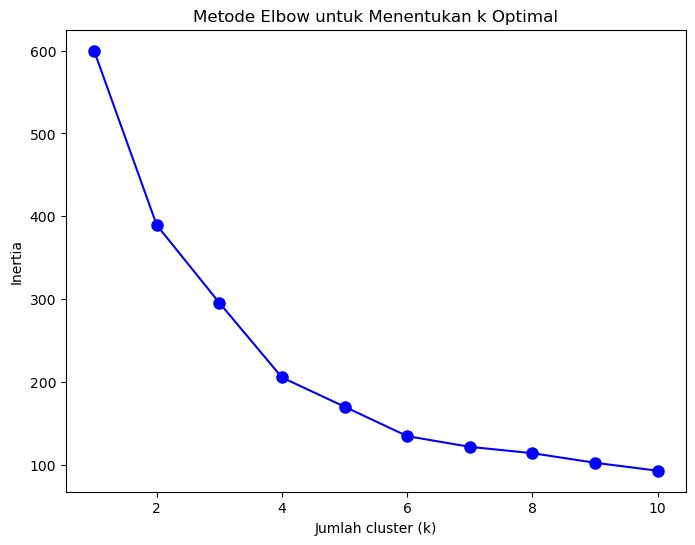

In [32]:
# Menentukan jumlah cluster yang optimal menggunakan Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot hasil Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

**Buat Model K-Means**

In [33]:
# Berdasarkan plot Elbow, kita pilih k=5
optimal_k = 5

# Membangun model K-Means dengan jumlah cluster optimal
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(X_scaled)

# Menambahkan label cluster ke dalam data asli
data['Cluster'] = kmeans_model.labels_

# Melihat data dengan label cluster
data.head()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


#### **4. Buatlah  implementasi model SOM untuk segmentasi citra lain**

**Import Library**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image

**Inisialisasi Bobot SOM**

In [40]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

**Hitung Jarak Vektor Input dan Bobot SOM**

In [42]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

**Unit Dengan Bobot Terdekat**

In [43]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

**Perbarui Bobot SOM**

In [44]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

**Latih SOM**

In [45]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)

        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

**Load Image**

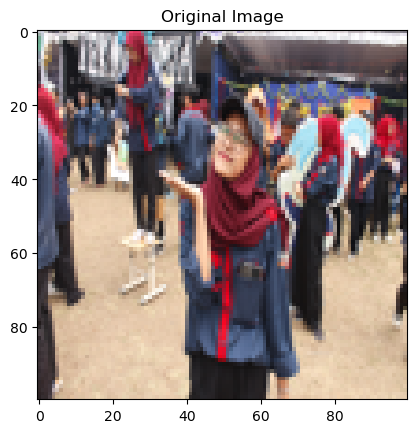

In [53]:
# Load citra Wulan
image_path = 'wulan.jpg'
img = Image.open(image_path)
img = img.resize((100, 100))  # Resize gambar agar proses lebih cepat

plt.title("Original Image")
plt.imshow(img)
plt.show()

**Normalisasi**

In [47]:
# Ubah gambar menjadi array dan normalisasi
image = np.array(img) / 255.0

**Latih SOM**

In [48]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius)

**Visualisasi**

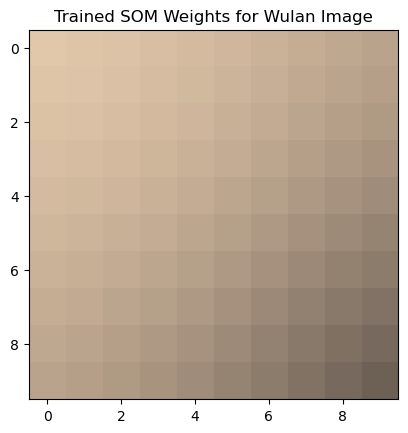

In [49]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Wulan Image')
plt.show()